# Classification with the Iris dataset

In [102]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#allow plots to appear within the notebook
%matplotlib inline

In [ ]:
iris = load_iris()
type(iris)

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#show integers representing the species of each observation (aka response)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#check the types of the features and response
#1st they should be seperate objects
#2nd they should always be numbers
#3rd they should be stored as numpy arrays
print(type(iris.data))
#response should always be numeric either if is a Classification or a Regression problem
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
#check the shape of the features (first dimension=number of observations, second dimension=number of features)
iris.data.shape

(150, 4)

In [10]:
#check the shape of the response (single dimension matches the number of observations)
iris.target.shape

(150,)

In [11]:
#store feature matrix in X (upper X for a matrix)
X = iris.data
#store response vector in y (lower y for a vector)
y = iris.target

In [12]:
#verify that X and y have the appropriate shapes
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## KNN (K=1)

In [13]:
#instantiating the estimator
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
#if we want to see the other parameters for the estimator, which we left on default
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [15]:
#fit the model with data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
#now the model can predict a new observation. 
#option 1: pass the data as a nested list, which will be interpreted as having shape (1, 4)
knn.predict([[3, 5, 4, 2]])

array([2])

In [17]:
#option 2: explicitly change the shape to be (1, 4)
knn.predict(np.reshape([3, 5, 4, 2],[1, 4]))

array([2])

In [18]:
#option 3: explicitly change the first dimension to be 1, let NumPy infer that the second dimension should be 4
knn.predict(np.reshape([3, 5, 4, 2],[1, -1]))

array([2])

In [19]:
iris.target_names[2]

'virginica'

In [20]:
#predict more than one observations
X_new = [[3, 5, 4, 2], [1, 2, 1, 2]]
knn.predict(X_new)

array([2, 0])

In [21]:
iris.target_names[knn.predict(X_new)]

array(['virginica', 'setosa'], dtype='<U10')

## KNN (K=5)

In [22]:
#instatiate the model with n_neighbors=5 (K=5)
knn = KNeighborsClassifier(n_neighbors = 5)

In [23]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
iris.target_names[knn.predict(X_new)]

array(['versicolor', 'setosa'], dtype='<U10')

## Logistic Regression

In [25]:
#using Logistic Regression, which is another model used for classification (despite its name)

In [26]:
logreg = LogisticRegression(multi_class = 'auto', solver = 'liblinear')
logreg.fit(X, y)
logreg.predict(X_new)

array([2, 2])

## Evaluation Procedure: 1. Training accuracy

In [27]:
#FOR THE LOGISTIC REGRESSION
#train and test on the entire dataset
#predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#store the predicted values
y_pred = logreg.predict(X)
#check length
len(y_pred)

150

In [29]:
#compute classification accuracy for the model

In [30]:
#96% of the predictions are correct. This is the training accuracy
metrics.accuracy_score(y, y_pred)

0.96

In [31]:
#FOR THE KNN(K=5)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)
y_pred = knn.predict(X)
#slightly better with 96,7%
metrics.accuracy_score(y, y_pred)

0.9666666666666667

In [32]:
#FOR THE KNN(K=1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
y_pred = knn.predict(X)
#we have 100% accuracy for K=1 because KNN has memorized the training set and it's finding the exact same observation
#a very low value of K creates a high complexity model which overfits the traing data!!!
metrics.accuracy_score(y, y_pred)

1.0

## Evaluation Procedure: 2. Train/Test split

In [33]:
#here random_state = 4 is used in order to split the dataset the exact same way every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

In [34]:
#check the shape of the new objects
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [35]:
#FOR LINEAR REGRESSION
#instantiating and fitting the model
logreg = LogisticRegression(multi_class = 'auto', solver = 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
#making predictions
y_pred = logreg.predict(X_test)
#compare the actual response values (y_test) with the predicted ones (y_pred)
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [37]:
#FOR KNN(K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

In [38]:
#FOR KNN(K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
#Out of the above scores we would say that KNN(K=5) is the best model to use for this dataset

0.95

### Making a loop to find out if other Ks perform better

In [39]:
k_range = range(1, 26)
scores = []
for num in k_range:
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy metrics')

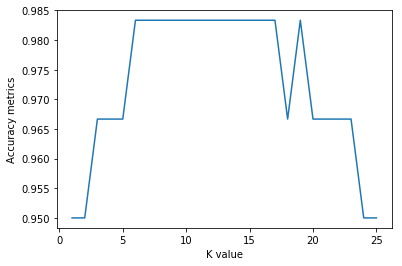

In [40]:
plt.plot(k_range, scores)
plt.xlabel('K value')
plt.ylabel('Accuracy metrics')
#Remember that testing accuracy penalizes models that are too complex or not complex enough! Typical example here

### Making predictions on out-of-sample data

In [41]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
knn.predict([[3, 5, 4, 2]])

array([1])

In [ ]:
'''Because the train/test split evaluation procedure has the downside of different results every time another part of the
dataset is being used, K-fold cross-validation can come to the rescue. This above procedure though, is flexible and 
quick'''

## Evaluation Procedure: 3. Cross-Validation

In [42]:
#10-fold cross validation with K=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [43]:
#use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [44]:
#search again for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for num in k_range:
    knn = KNeighborsClassifier(n_neighbors=num)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-validated accuracy')

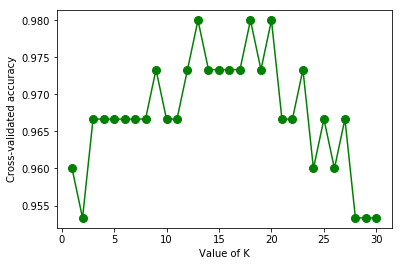

In [45]:
#visualize the accuracy scores
plt.plot(k_range, k_scores, color='green', marker='o', markersize=8)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated accuracy')

### Compare the models' accuracy

In [46]:
#Higher values of K produce lower complexity models and therefore the K=20 is a better choise
#Compare the means of cross-validation for KNN and Logistic Regression to choose which model fits better to this dataset
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [47]:
logreg = LogisticRegression(multi_class = 'auto', solver = 'liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


### Parameter tuning with cross-validation 
The K parameter

In [53]:
#how to replace the for loop and provide aditional functionality with GridSearchCV
#define the parameter values that should be searched and create a parameter grid. Map the parameter names to the values
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [54]:
#instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [55]:
#fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
# convert the search results into a pandas DataFrame
results = pd.DataFrame(grid.cv_results_)

In [64]:
# view the mean and standard deviation of the test scores for each set of parameters
# while we pay attention to the mean we must see if the std is high. 
#Because that means that the cross-validate estimate of the accuracy might be not much reliable
results[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [70]:
# how to examine the results of the first set of parameters for example
print(results['params'][0])
print(results['std_test_score'][0])
print(results['mean_test_score'][0])

{'n_neighbors': 1}
0.053333333333333316
0.96


Text(0, 0.5, 'Cross validated accuracy')

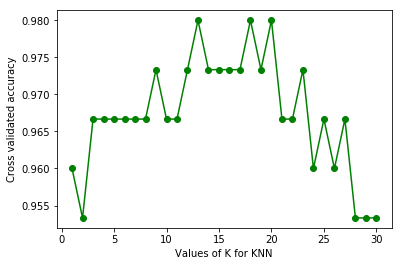

In [83]:
#plot the results for a better view
plt.plot(k_range, results['mean_test_score'], color='green', marker='o')
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross validated accuracy')

In [84]:
#examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


### Parameter tuning with cross-validation
The weights parameter

In [85]:
#the default value for weights is 'uniform' for KNN but it can be changed to 'distance'
#define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [87]:
#create a parameter grid as before
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [88]:
#instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
#view the results
results = pd.DataFrame(grid.cv_results_)
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000000      0.000000         0.000000        0.000000   
1        0.000000      0.000000         0.008465        0.020727   
2        0.000654      0.001962         0.001562        0.004687   
3        0.001562      0.004687         0.000000        0.000000   
4        0.001565      0.004696         0.001559        0.004677   
5        0.000000      0.000000         0.001559        0.004677   
6        0.000000      0.000000         0.000000        0.000000   
7        0.000000      0.000000         0.000000        0.000000   
8        0.000000      0.000000         0.003125        0.006249   
9        0.000000      0.000000         0.001566        0.004697   
10       0.000000      0.000000         0.000000        0.000000   
11       0.000000      0.000000         0.002218        0.004878   
12       0.000000      0.000000         0.000000        0.000000   
13       0.000000      0.000000         0.000000

In [92]:
#examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


Train the model with the best parameters

In [95]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)
knn.predict([[3, 5, 4, 2]])

array([1])

In [99]:
#This shortcut can be used
grid.predict([[3, 5, 4, 2]])

array([1])

In [101]:
iris.target_names[1]

'versicolor'

### RandomizedSearchCV
Having too many parameters to tune. Solve the computational problem

In [103]:
#Specify parameter distributions rather than parameter grid
#It needs continuous parameters so in this case it will be the same as before
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [106]:
#n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [108]:
results = pd.DataFrame(rand.cv_results_)
print(results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.000000      0.000000         0.003124        0.006249      distance   
1       0.000000      0.000000         0.000000        0.000000       uniform   
2       0.001562      0.004687         0.001562        0.004687       uniform   
3       0.000000      0.000000         0.000000        0.000000       uniform   
4       0.000000      0.000000         0.001563        0.004689       uniform   

  param_n_neighbors                                      params  \
0                16  {'weights': 'distance', 'n_neighbors': 16}   
1                22   {'weights': 'uniform', 'n_neighbors': 22}   
2                18   {'weights': 'uniform', 'n_neighbors': 18}   
3                27   {'weights': 'uniform', 'n_neighbors': 27}   
4                29   {'weights': 'uniform', 'n_neighbors': 29}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           1.000000           0.933333    

In [109]:
#the best score is the same as GridSearchCV
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
